In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('merged firm and yearly data.csv')
dataset

,Unnamed: 0,RIC,Date,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio),returns_monthly
0,0,BVIC.L,2009,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,45.539754,59.077651,53.535053,1430.561330,817.381317,19.299905,48.651108
1,1,BVIC.L,2010,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,57.622888,31.890959,55.261467,1772.376566,889.120843,16.927900,15.557061
2,2,BVIC.L,2011,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,57.397993,28.924942,45.229496,1205.126197,836.280911,13.534436,-33.927688
3,3,BVIC.L,2012,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,70.633040,37.216902,55.762859,1603.272359,872.046035,18.363571,27.226920
4,4,BVIC.L,2013,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,52.778937,33.146107,58.148148,2819.919676,907.653333,27.421399,56.909555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24474,24474,AKSEN.IS,2017,418.425922,593.193096,686.553906,1177.461636,-96.256459,0.734857,901.182930,110.510293,NaN,NaN,NaN,NaN,NaN,2619.106333,923.520348,NaN,37.755638
24475,24475,AKSEN.IS,2018,388.901048,565.800430,644.077984,1372.966659,93.013406,0.774613,949.937152,423.188261,5241.540615,43.092015,45.157241,78.979592,20.402384,1217.855427,1228.850942,5.424041,-36.661598
24476,24476,AKSEN.IS,2019,459.703083,534.734499,659.116542,1217.569452,4.765679,0.720062,883.039715,309.416385,4139.452613,36.847893,41.068317,61.910235,18.877956,1535.138199,1006.925461,12.342718,44.681008
24477,24477,AKSEN.IS,2020,451.245129,495.033610,533.871469,1429.264455,52.764679,0.764805,937.909982,586.836549,5443.698902,41.214852,56.987548,34.224871,33.265132,2405.441989,1271.610600,8.760031,76.431919


In [3]:
# remove unnamed and direclty correlated rows from dataset
columns = ['Total Current Assets', 'Total Current Liabilities',
       'Total Debt', 'Total Assets, Reported', 'Net Income - Actual',
       'Revenue Per Share', 'Total Revenue', 'Total Equity', 'CO2 Emissions',
       'ESG Score', #'Social Pillar Score', 'Governance Pillar Score','Environmental Pillar Score',
        'Company Market Capitalization',
       'PPE Total', 'P/E (Daily Time Series Ratio)','returns_monthly']

dataset = dataset[columns]
dataset.head(5)



,Total Current Assets,Total Current Liabilities,Total Debt,"Total Assets, Reported",Net Income - Actual,Revenue Per Share,Total Revenue,Total Equity,CO2 Emissions,ESG Score,Company Market Capitalization,PPE Total,P/E (Daily Time Series Ratio),returns_monthly
0,434.373405,483.824655,718.957376,1361.504594,107.309409,7.068281,1561.383359,-3.988004,NaN,51.267135,1430.561330,817.381317,19.299905,48.651108
1,579.778906,580.095207,901.298414,1655.358922,139.656087,8.006665,1800.699024,-48.552134,NaN,50.550242,1772.376566,889.120843,16.927900,15.557061
2,598.968478,607.694345,893.154869,1660.096296,122.255528,7.912984,2010.689188,35.059289,NaN,46.732870,1205.126197,836.280911,13.534436,-33.927688
3,615.523874,601.137943,907.121844,1658.099764,100.765756,7.914423,2030.840850,59.968319,NaN,57.941343,1603.272359,872.046035,18.363571,27.226920
4,748.229068,814.064189,895.874010,1714.940377,133.919162,8.716901,2133.025672,65.996482,31.296503,49.513243,2819.919676,907.653333,27.421399,56.909555


In [4]:
# remove all rows which have null values for ESG score

dataset = dataset.dropna(subset=['ESG Score'])

# check null values in other columns
nullvalues_df = dataset.apply(lambda x: sum(x.isnull())).to_frame(name= 'count')
print(nullvalues_df)


# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency
# import missingno as msno


# # Create new binary variables for each column indicating whether the value is missing or not
# for col in dataset.columns:
#     if dataset[col].isnull().any():
#         dataset['Missing ' + col] = dataset[col].isnull().astype(int)

# # Calculate the contingency table and chi-square statistic for each pair of missingness binary variables
# for i, col1 in enumerate(dataset.columns):
#     if 'Missing' in col1:
#         for j, col2 in enumerate(dataset.columns):
#             if 'Missing' in col2 and j > i:
#                 contingency_table = pd.crosstab(dataset[col1], dataset[col2])
#                 chi2, p_value, dof, expected = chi2_contingency(contingency_table)
#                 print(f'{col1} vs {col2}: Chi-square={chi2:.2f}, p-value={p_value:.4f}')

# # Visualize the patterns of missingness in your dataset
# msno.matrix(dataset)



                               count
Total Current Assets             725
Total Current Liabilities        725
Total Debt                        16
Total Assets, Reported            17
Net Income - Actual              658
Revenue Per Share                 46
Total Revenue                     16
Total Equity                      17
CO2 Emissions                   3354
ESG Score                          0
Company Market Capitalization    143
PPE Total                        995
P/E (Daily Time Series Ratio)   2773
returns_monthly                    0


array([[<AxesSubplot:title={'center':'Total Current Assets'}>,
        <AxesSubplot:title={'center':'Total Current Liabilities'}>,
        <AxesSubplot:title={'center':'Total Debt'}>,
        <AxesSubplot:title={'center':'Total Assets, Reported'}>],
       [<AxesSubplot:title={'center':'Net Income - Actual'}>,
        <AxesSubplot:title={'center':'Revenue Per Share'}>,
        <AxesSubplot:title={'center':'Total Revenue'}>,
        <AxesSubplot:title={'center':'Total Equity'}>],
       [<AxesSubplot:title={'center':'CO2 Emissions'}>,
        <AxesSubplot:title={'center':'ESG Score'}>,
        <AxesSubplot:title={'center':'Company Market Capitalization'}>,
        <AxesSubplot:title={'center':'PPE Total'}>],
       [<AxesSubplot:title={'center':'P/E (Daily Time Series Ratio)'}>,
        <AxesSubplot:title={'center':'returns_monthly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

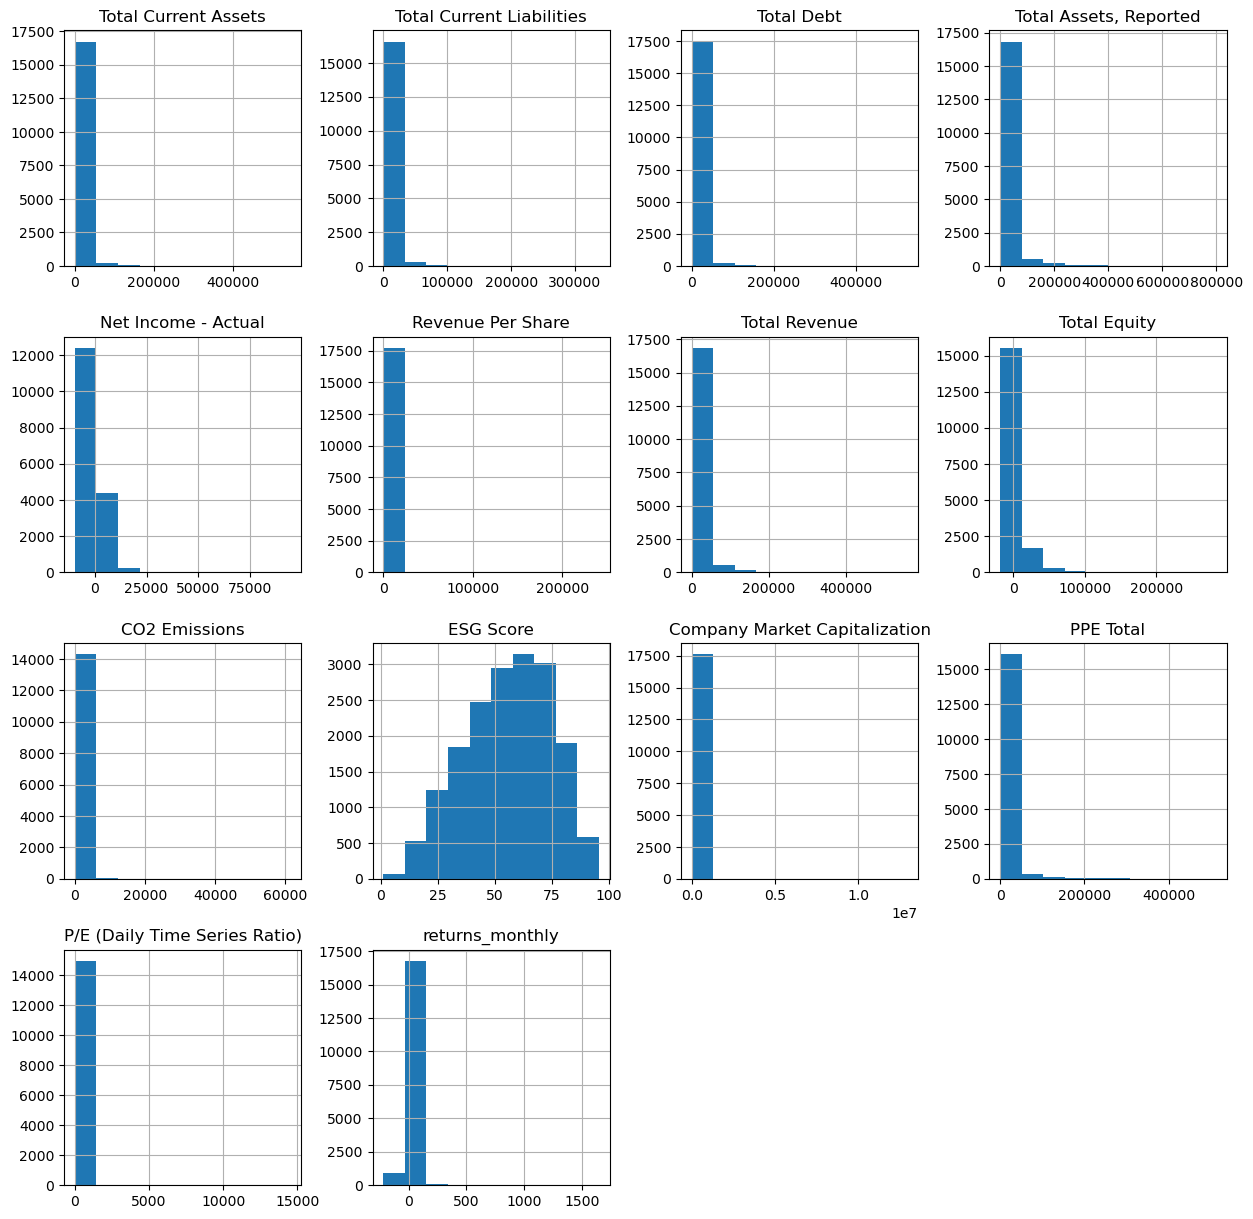

In [5]:
# check distribution of data

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


# Plot a histogram


dataset[columns].hist( figsize=(15,15))


In [6]:
from sklearn.impute import KNNImputer


# Identify the columns with missing values
missing_cols = ['Total Current Assets', 'Total Current Liabilities', 'Total Debt','Total Assets, Reported','Net Income - Actual',
                'Revenue Per Share','Total Revenue', 'Total Equity', 'CO2 Emissions','Company Market Capitalization', 'PPE Total',
                'P/E (Daily Time Series Ratio)']






In [7]:
# Split the dataset into two parts
missing_data = dataset[dataset[missing_cols].isna().any(axis=1)]
complete_data = dataset.dropna(subset=missing_cols)


# Normalize the dataset by doing Z scale normalization
norm_data = (complete_data - complete_data.mean()) / complete_data.std()

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
imputed_data = imputer.fit_transform(norm_data)

# Convert the imputed data back to a pandas DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=complete_data.columns)






In [8]:


# Combine the imputed data with the missing data
combined_data = pd.concat([imputed_df, complete_data])



In [9]:
#export merged dataframe
combined_data.to_csv('preprocessed data.csv')